In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from pathlib import Path

In [2]:
data = pd.read_csv(str(Path().resolve().parents[2])+"\Datasets\Predict Genetic Disorder Dataset\genetic_disorder.csv")

In [3]:
data=data.drop(["Patient Id", "Patient Age", "Patient First Name", "Family Name", "Father's name", "Mother's age", "Father's age", "Institute Name", "Location of Institute", "Status", "Test 1", "Test 2", "Test 3", "Test 4", "Test 5", "Parental consent", "Place of birth", "Disorder Subclass"], axis=1)

In [4]:
data.shape

(22083, 27)

In [5]:
df=data
df=df.replace({'-':np.nan})

In [6]:
cat_cols=[]
num_cols=[]
from pandas.api.types import is_numeric_dtype
for column in df:
    if not is_numeric_dtype(df[column]):
        cat_cols.append(column)
    else:
        num_cols.append(column)

In [7]:
stats_df = df[num_cols].describe()
stats_df

,Blood cell count (mcL),No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
count,22083.000000,19921.000000,19935.000000,19928.000000,19861.000000,19982.000000,19970.000000,19930.000000
mean,4.898871,2.003062,7.486224,0.592483,0.551886,0.536233,0.497747,0.461917
std,0.199663,1.411919,2.653393,0.491385,0.497313,0.498698,0.500007,0.498560
min,4.092727,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.763109,1.000000,5.424703,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.899399,2.000000,7.477132,1.000000,1.000000,1.000000,0.000000,0.000000
75%,5.033830,3.000000,9.526152,1.000000,1.000000,1.000000,1.000000,1.000000
max,5.609829,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'Frequency')

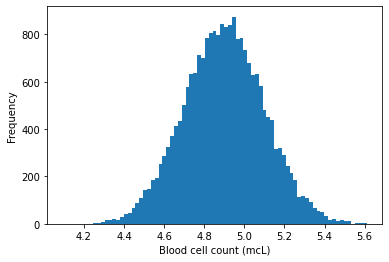

In [8]:
plt.hist(x=df["Blood cell count (mcL)"], bins='auto')
plt.xlabel('Blood cell count (mcL)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

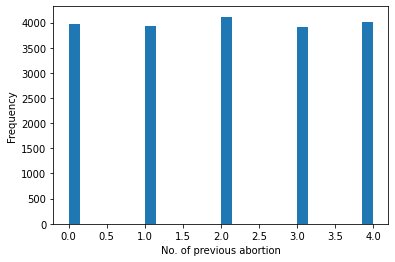

In [9]:
plt.hist(x=df["No. of previous abortion"], bins='auto')
plt.xlabel('No. of previous abortion')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

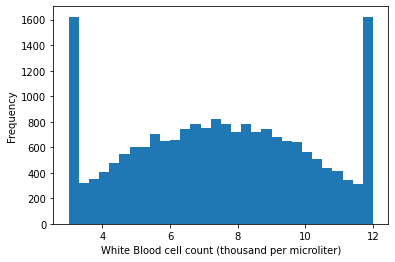

In [10]:
plt.hist(x=df["White Blood cell count (thousand per microliter)"], bins='auto')
plt.xlabel('White Blood cell count (thousand per microliter)')
plt.ylabel('Frequency')

<AxesSubplot:>

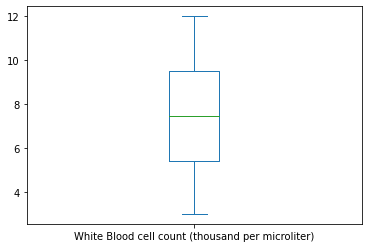

In [11]:
df["White Blood cell count (thousand per microliter)"].plot.box()

In [12]:
from scipy.stats import chi2_contingency
sig_cols = []
for column in cat_cols:
    stat, p, dof, expected = chi2_contingency(pd.crosstab(df[column],df['Genetic Disorder']))
    if p < 0.1:
        print('Column: {0}, p: {1}'.format(column, p))
        sig_cols.append(column)

Column: Genes in mother's side, p: 1.1467655663681908e-38
Column: Inherited from father, p: 3.001679792644031e-38
Column: Maternal gene, p: 1.2927887155021174e-25
Column: Paternal gene, p: 3.452529030466087e-25
Column: Blood test result, p: 0.001679257943707886
Column: Genetic Disorder, p: 0.0


In [13]:
df = df[df['Genetic Disorder'].notna()]
df.shape

(19937, 27)

In [14]:
cols=num_cols.copy()
cols.extend(sig_cols)
cols

['Blood cell count (mcL)',
 'No. of previous abortion',
 'White Blood cell count (thousand per microliter)',
 'Symptom 1',
 'Symptom 2',
 'Symptom 3',
 'Symptom 4',
 'Symptom 5',
 "Genes in mother's side",
 'Inherited from father',
 'Maternal gene',
 'Paternal gene',
 'Blood test result',
 'Genetic Disorder']

In [15]:
df = df[cols]
df.shape

(19937, 14)

In [16]:
df=df.dropna(axis=0)
df.shape

(9861, 14)

In [17]:
df.isna().sum()

Blood cell count (mcL)                              0
No. of previous abortion                            0
White Blood cell count (thousand per microliter)    0
Symptom 1                                           0
Symptom 2                                           0
Symptom 3                                           0
Symptom 4                                           0
Symptom 5                                           0
Genes in mother's side                              0
Inherited from father                               0
Maternal gene                                       0
Paternal gene                                       0
Blood test result                                   0
Genetic Disorder                                    0
dtype: int64

In [18]:
for column in sig_cols:
        print(df[column].value_counts())
        print("----------------------------------")

Yes    5856
No     4005
Name: Genes in mother's side, dtype: int64
----------------------------------
No     5904
Yes    3957
Name: Inherited from father, dtype: int64
----------------------------------
Yes    5482
No     4379
Name: Maternal gene, dtype: int64
----------------------------------
No     5603
Yes    4258
Name: Paternal gene, dtype: int64
----------------------------------
slightly abnormal    2507
inconclusive         2464
normal               2461
abnormal             2429
Name: Blood test result, dtype: int64
----------------------------------
Mitochondrial genetic inheritance disorders     5043
Single-gene inheritance diseases                3765
Multifactorial genetic inheritance disorders    1053
Name: Genetic Disorder, dtype: int64
----------------------------------


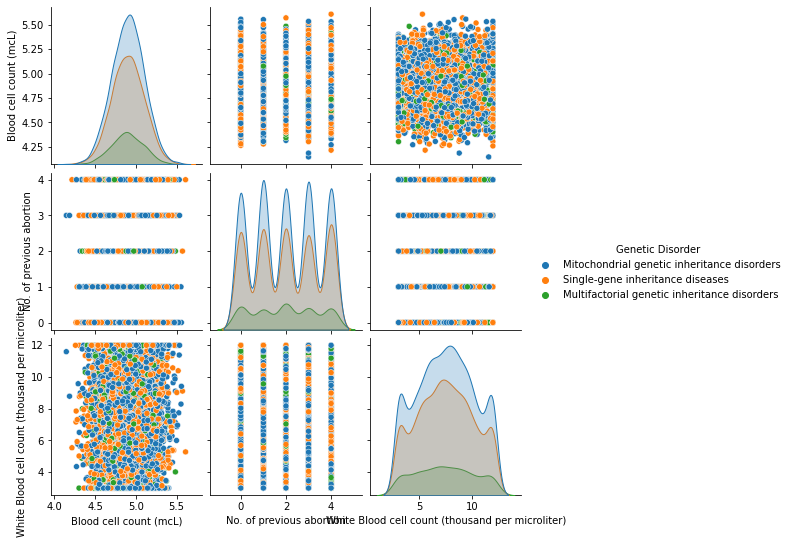

In [19]:
seaborn.pairplot(df[["Blood cell count (mcL)","No. of previous abortion", "White Blood cell count (thousand per microliter)",'Genetic Disorder']], hue ='Genetic Disorder')
plt.show()

In [20]:
#Encoding
columns_to_one_hot_encode = ["Genes in mother's side","Inherited from father","Maternal gene","Paternal gene",
                            "Blood test result"]
columns_to_ordinal_encode = ["No. of previous abortion"]
columns_to_min_max_scale = ["Blood cell count (mcL)","White Blood cell count (thousand per microliter)"]

In [21]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(
    [('OHE', OneHotEncoder(sparse=False),columns_to_one_hot_encode),(
    'OREN', OrdinalEncoder(),columns_to_ordinal_encode),(
    'MMS', MinMaxScaler(),columns_to_min_max_scale)],remainder = 'passthrough')
features = ct.fit_transform(df.iloc[:,:-1])
features[0]

array([0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.38196973, 0.54659122,
       0.        , 0.        , 1.        , 0.        , 0.        ])

In [22]:
laen = LabelEncoder()
target = laen.fit_transform(df["Genetic Disorder"])

In [23]:
target

array([0, 2, 2, ..., 0, 1, 1])

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=9)

In [26]:
type(X_test)

numpy.ndarray

In [27]:
#Logistic Regression
LR = LogisticRegression(solver='liblinear')
LR = LR.fit(X_train, Y_train)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn = KNeighborsClassifier(n_neighbors=51)
knn = knn.fit(X_train, Y_train)

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dt = DecisionTreeClassifier(random_state=45)
dt = dt.fit(X_train, Y_train)

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=45),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, Y_train)

In [34]:
### BEGIN SOLUTION
# Predict the class
y_pred = list()

coeff_labels = ['LR', 'KNN', 'DT', 'GR']
coeff_models = [LR, knn, dt, GR]

for lab, mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)

y_pred.head()

c:\users\chaitanya\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,LR,KNN,DT,GR
0,0,0,0,2
1,0,2,1,0
2,0,0,2,0
3,0,0,0,0
4,0,2,2,0


In [35]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    precision, recall, fscore, _ = score(Y_test, y_pred[lab], average='weighted')
    
    accuracy = accuracy_score(Y_test, y_pred[lab])
    
    auc = roc_auc_score(label_binarize(Y_test, classes=[0,1,2]),
              label_binarize(y_pred[lab], classes=[0,1,2]), 
              average='weighted')
    
    cm[lab] = confusion_matrix(Y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [36]:
metrics

,LR,KNN,DT,GR
precision,0.313433,0.530010,0.540451,0.615110
recall,0.514952,0.550431,0.537760,0.623923
fscore,0.376798,0.494887,0.539027,0.616446
accuracy,0.514952,0.550431,0.537760,0.623923
auc,0.518297,0.566826,0.607839,0.669339


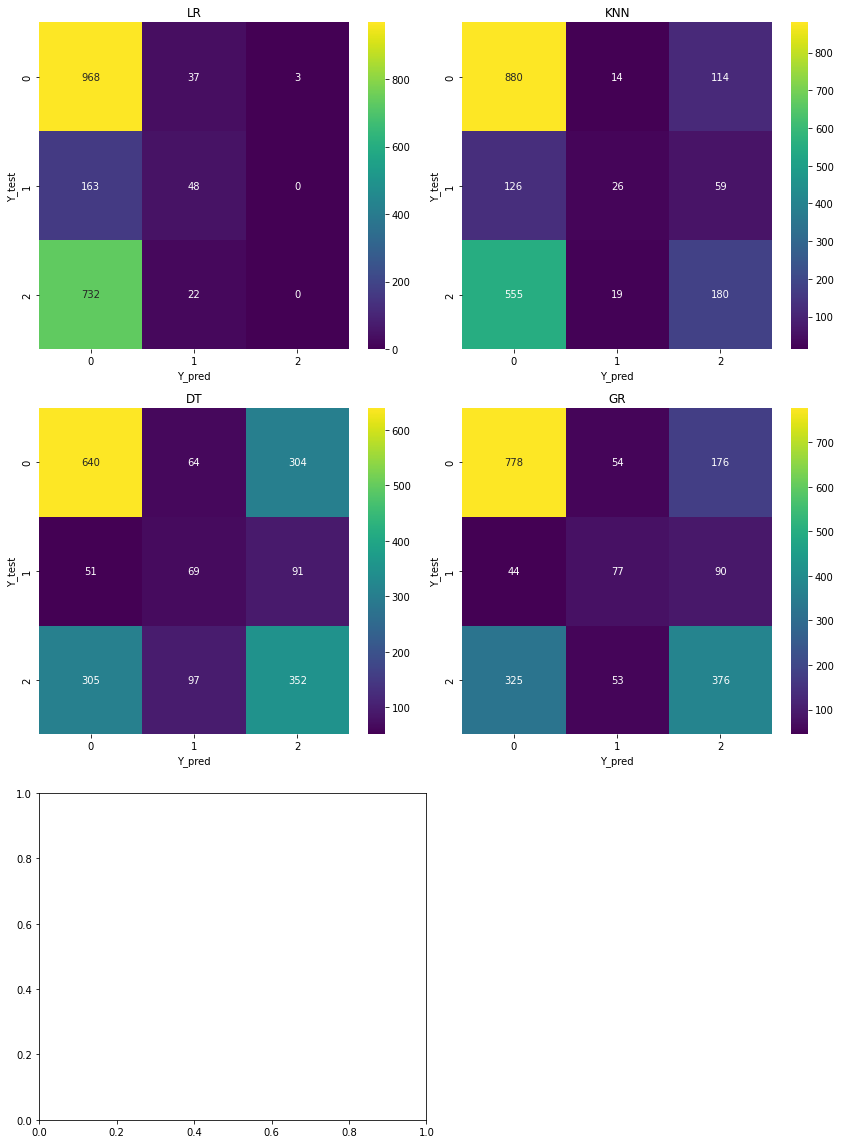

In [39]:
import seaborn as sns
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 16)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d', cmap='viridis');
    ax.set(title=lab);
    ax.set_xlabel('Y_pred')
    ax.set_ylabel('Y_test'); 
    
plt.tight_layout()
### END SOLUTION